In [1]:
from pathlib import Path

import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
from pycaret.classification import *
%matplotlib inline

## 生データそのままを学習してみる

### 学習用データのロード

In [2]:
train_data = pd.read_csv('../dataset/row/train.csv')
display(train_data.shape)
display(train_data.isna().sum())
train_data = train_data.drop('PassengerId', axis=1)
train_data.head()

(891, 12)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
exp_titanic = setup(data=train_data, target='Survived', session_id=123)

,Description,Value
0,session_id,123
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(891, 11)"
5,Missing Values,True
6,Numeric Features,2
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


### モデル比較

In [4]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8154,0.8575,0.6923,0.8140,0.7470,0.6030,0.6091,0.0660
catboost,CatBoost Classifier,0.8154,0.8634,0.6557,0.8387,0.7354,0.5969,0.6080,1.2240
ridge,Ridge Classifier,0.8139,0.0000,0.7462,0.7727,0.7587,0.6072,0.6080,0.0160
lr,Logistic Regression,0.8138,0.8586,0.7538,0.7701,0.7608,0.6084,0.6096,0.2780
dt,Decision Tree Classifier,0.8090,0.7976,0.7457,0.7660,0.7537,0.5979,0.6000,0.0160
ada,Ada Boost Classifier,0.8042,0.8458,0.7130,0.7762,0.7407,0.5838,0.5876,0.0400
rf,Random Forest Classifier,0.7994,0.8653,0.6763,0.7829,0.7241,0.5681,0.5731,0.0760
et,Extra Trees Classifier,0.7978,0.8589,0.6890,0.7697,0.7252,0.5666,0.5703,0.0750
lightgbm,Light Gradient Boosting Machine,0.7881,0.8487,0.6925,0.7540,0.7171,0.5489,0.5539,0.0230
xgboost,Extreme Gradient Boosting,0.7752,0.8407,0.6882,0.7360,0.7061,0.5250,0.5303,0.3490


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### xgboost学習 + チューニング

In [5]:
model = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,0.9147,0.7600,0.8636,0.8085,0.6953,0.6989
1,0.8254,0.8568,0.7600,0.7917,0.7755,0.6328,0.6331
2,0.6984,0.8195,0.6800,0.6071,0.6415,0.3827,0.3845
3,0.7581,0.7957,0.6400,0.7273,0.6809,0.4873,0.4899
4,0.7903,0.7780,0.5417,0.8667,0.6667,0.5253,0.5562
5,0.7742,0.8816,0.6250,0.7500,0.6818,0.5090,0.5141
6,0.7581,0.8224,0.6667,0.6957,0.6809,0.4862,0.4865
7,0.8387,0.8827,0.7917,0.7917,0.7917,0.6601,0.6601
8,0.7097,0.8103,0.7500,0.6000,0.6667,0.4151,0.4232


In [6]:
tuned_model = tune_model(model)
tuned_model.get_xgb_params()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8730,0.8758,0.8000,0.8696,0.8333,0.7311,0.7327
1,0.7937,0.8811,0.8000,0.7143,0.7547,0.5776,0.5804
2,0.7302,0.8337,0.8000,0.6250,0.7018,0.4621,0.4738
3,0.6935,0.7865,0.7600,0.5938,0.6667,0.3909,0.4011
4,0.7097,0.7505,0.6250,0.6250,0.6250,0.3882,0.3882
5,0.8065,0.8679,0.7500,0.7500,0.7500,0.5921,0.5921
6,0.8226,0.8893,0.8333,0.7407,0.7843,0.6345,0.6377
7,0.8226,0.9298,0.8333,0.7407,0.7843,0.6345,0.6377
8,0.8387,0.8684,0.8750,0.7500,0.8077,0.6702,0.6761


{'objective': 'binary:logistic',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'interaction_constraints': '',
 'learning_rate': 0.0005,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 10,
 'max_leaves': 0,
 'min_child_weight': 1,
 'monotone_constraints': '()',
 'n_jobs': -1,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 123,
 'reg_alpha': 0.05,
 'reg_lambda': 5,
 'sampling_method': 'uniform',
 'scale_pos_weight': 2.1,
 'subsample': 0.5,
 'tree_method': 'auto',
 'validate_parameters': 1,
 'verbosity': 0}

### 評価指標のプロット

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


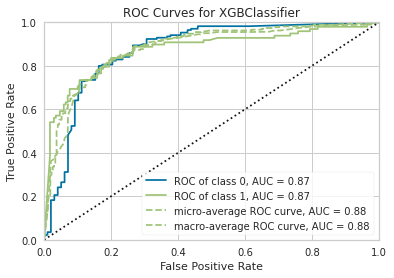

In [7]:
plot_model(tuned_model, plot='auc')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


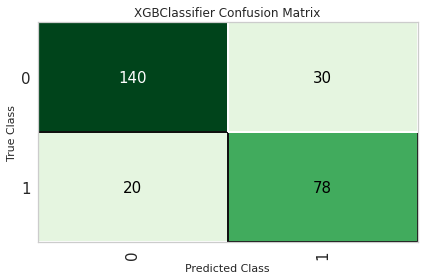

In [8]:
plot_model(tuned_model, plot='confusion_matrix')

### 結果予測

In [9]:
final = finalize_model(tuned_model)
test_data = pd.read_csv('../dataset/test.csv')
result = predict_model(final, data = test_data)
result.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.5427
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.5026
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.5282
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.5433
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0.5216


In [11]:
output = pd.DataFrame({'PassengerId': result['PassengerId'], 'Survived': result['Label']})
output.to_csv('../submits/submission.csv', index=False)

## 前処理ありのデータを学習

In [2]:
ROOT_DIR = Path('../dataset/preprocessed/20220429_184850/')
train_data = pd.read_csv(str(ROOT_DIR / 'train.csv'), dtype=int)
test_data = pd.read_csv(str(ROOT_DIR / 'test.csv'), dtype=int)

display(train_data.shape)
display(train_data.isna().sum())
train_data.head()

(891, 12)

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Embarked       0
FamilySize     0
BoyOrFemale    0
FareBin        0
AgeBin         0
Title          0
dtype: int64

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,FamilySize,BoyOrFemale,FareBin,AgeBin,Title
0,1,0,3,1,1,0,2,1,1,0,1,2
1,2,1,1,0,1,0,0,1,0,4,3,3
2,3,1,3,0,0,0,2,0,0,1,1,1
3,4,1,1,0,1,0,2,1,0,4,2,3
4,5,0,3,1,0,0,2,0,1,1,2,2


In [25]:
exp_titanic = setup(data=train_data, target='Survived', session_id=123)

,Description,Value
0,session_id,123
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(891, 12)"
5,Missing Values,False
6,Numeric Features,1
7,Categorical Features,10
8,Ordinal Features,False
9,High Cardinality Features,False


In [26]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8204,0.8578,0.7587,0.7810,0.7689,0.6221,0.6230,0.0050
lda,Linear Discriminant Analysis,0.8187,0.8571,0.7458,0.7834,0.7634,0.6165,0.6177,0.0030
ridge,Ridge Classifier,0.8171,0.0000,0.7417,0.7827,0.7609,0.6129,0.6141,0.0020
lightgbm,Light Gradient Boosting Machine,0.8091,0.8528,0.6888,0.8006,0.7389,0.5899,0.5954,0.0070
gbc,Gradient Boosting Classifier,0.8075,0.8720,0.6888,0.7962,0.7376,0.5868,0.5916,0.0160
catboost,CatBoost Classifier,0.8026,0.8623,0.6927,0.7848,0.7343,0.5781,0.5824,0.5030
xgboost,Extreme Gradient Boosting,0.8025,0.8471,0.6968,0.7775,0.7343,0.5780,0.5808,0.0520
ada,Ada Boost Classifier,0.7995,0.8530,0.7422,0.7472,0.7439,0.5792,0.5800,0.0170
rf,Random Forest Classifier,0.7994,0.8467,0.6888,0.7792,0.7303,0.5715,0.5751,0.0500
knn,K Neighbors Classifier,0.7963,0.8424,0.6893,0.7742,0.7253,0.5649,0.5707,0.0060


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7937,0.8668,0.6400,0.8000,0.7111,0.5537,0.5620
1,0.8095,0.8747,0.7200,0.7826,0.7500,0.5966,0.5979
2,0.7460,0.8421,0.7200,0.6667,0.6923,0.4766,0.4777
3,0.7581,0.7724,0.6000,0.7500,0.6667,0.4804,0.4878
4,0.7581,0.7928,0.6250,0.7143,0.6667,0.4781,0.4807
5,0.8548,0.9084,0.7083,0.8947,0.7907,0.6819,0.6928
6,0.8226,0.8882,0.6667,0.8421,0.7442,0.6112,0.6209
7,0.9032,0.9156,0.8333,0.9091,0.8696,0.7929,0.7948
8,0.8548,0.8525,0.7500,0.8571,0.8000,0.6869,0.6906


In [28]:
tuned_model = tune_model(model, search_library='optuna')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,0.8716,0.7600,0.8636,0.8085,0.6953,0.6989
1,0.8413,0.8737,0.7200,0.8571,0.7826,0.6591,0.6653
2,0.7460,0.8253,0.6800,0.6800,0.6800,0.4695,0.4695
3,0.8065,0.7930,0.6800,0.8095,0.7391,0.5871,0.5928
4,0.7742,0.7895,0.6667,0.7273,0.6957,0.5167,0.5179
5,0.8226,0.9041,0.6667,0.8421,0.7442,0.6112,0.6209
6,0.7903,0.9046,0.6250,0.7895,0.6977,0.5405,0.5491
7,0.9032,0.9364,0.8333,0.9091,0.8696,0.7929,0.7948
8,0.8387,0.8668,0.7500,0.8182,0.7826,0.6548,0.6564


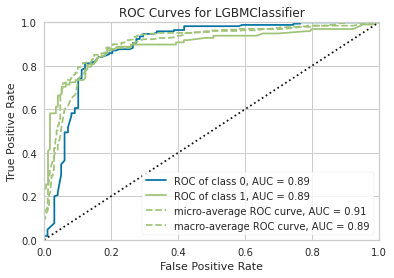

In [29]:
plot_model(tuned_model, plot='auc')

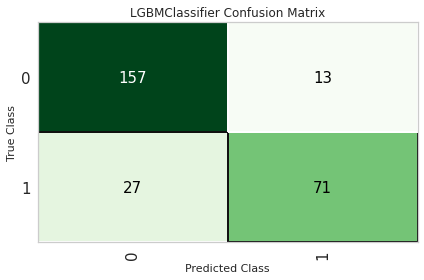

In [30]:
plot_model(tuned_model, plot='confusion_matrix')

In [31]:
final = finalize_model(tuned_model)
result = predict_model(final, data = test_data)
result.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,FamilySize,BoyOrFemale,FareBin,AgeBin,Title,Label,Score
0,892,3,1,0,0,1,0,1,1,2,2,0,0.8225
1,893,3,0,1,0,2,1,0,0,3,3,1,0.5085
2,894,2,1,0,0,1,0,1,1,3,2,0,0.8480
3,895,3,1,0,0,2,0,1,1,1,2,0,0.8486
4,896,3,0,1,1,2,2,0,2,0,3,1,0.5611


In [32]:
OUT_DIR = Path('../submits/') / Path(ROOT_DIR).name
if not OUT_DIR.exists():
    OUT_DIR.mkdir(parents=True)
output = pd.DataFrame({'PassengerId': result['PassengerId'], 'Survived': result['Label']})
output.to_csv(
    str(OUT_DIR / 'submission.csv'),
    index=False
)